<span style="font-size:30px">**Medidas de centralidad de los nodos. Parte 3: Centralidad de Eigenvector.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Fundamentos de la centralidad de eigenvector:

### El tomar el eigenvector de la matriz de adyacencia asociada a una red para un criterio de centralidad, resulta en una generalización de la centralidad de grado.

### Recordemos que en general la centralidad de grado cuantifica la importancia de un nodo en función de los enlaces que tiene con sus vecinos. La centralidad de eigenvector hace los mismo, pero considera también los vecinos de los vecinos para determinar la centralidad de un nodo.

### El eigenvector $\vec{v}$ de la matriz $A$ cumple, dado un eigenvalor $\lambda$, con la ecuación:

<font size="5"> $A\vec{v}= \lambda \vec{v}$ </font>

### Por lo que definimos la centralidad de eigenvector para un nodo $i$ mediante las entradas del vector $\vec{v}$:

<font size="5"> $\vec{v}=\frac{1}{\lambda}A\vec{v} \Rightarrow v_i=C_{eig} (i)= \frac{1}{\lambda} \sum_j A_{ij} v_j$ </font>

# Ejercicio:

### Siguiendo la misma estructura que en notebooks anteriores, implementar una centralidad de intermediación a la red 
### *ca-netscience.mtx* usando NetworkX.

,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


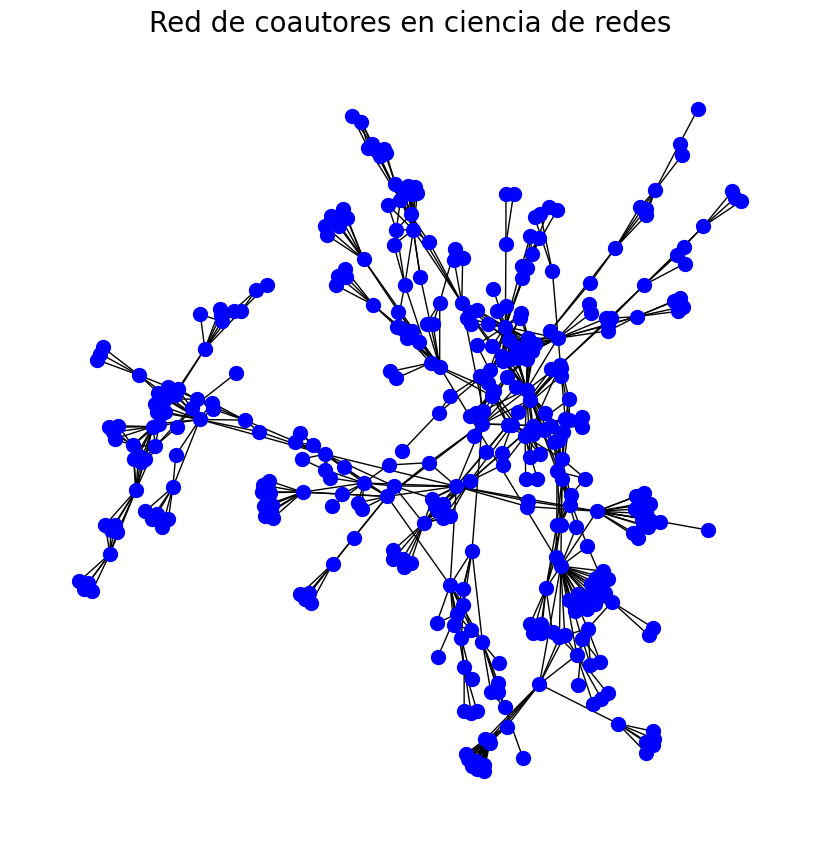

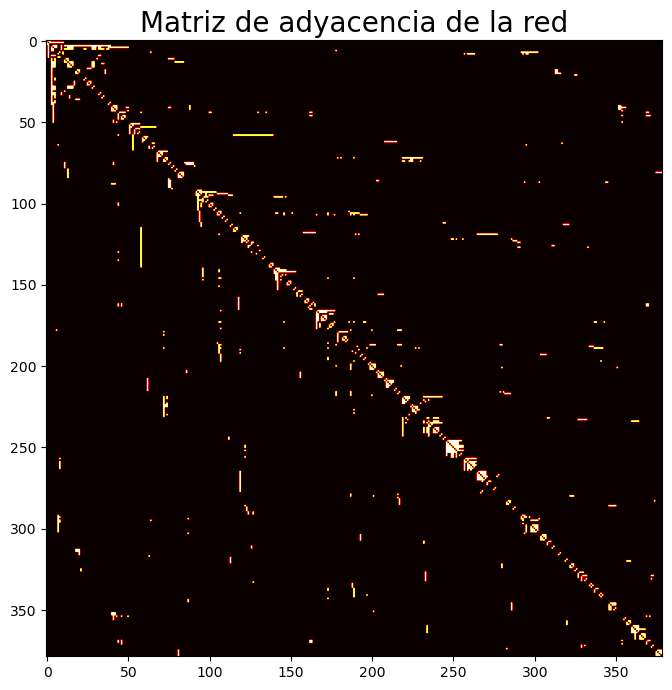

El orden de la matriz es de 379 x 379

La centralidad de eigenvector asociada a los nodos de la red es:


{2: 0.014838267214447485,
 1: 0.1391155222468906,
 3: 0.014838267214447485,
 4: 0.4142986919485969,
 5: 0.35620760980918204,
 16: 0.34644984317573335,
 44: 0.08855221930373537,
 113: 0.022246449049893157,
 131: 0.021300361549679642,
 250: 0.1470501642695783,
 259: 0.01760526466696302,
 13: 0.1209779840445493,
 14: 0.10963067485617453,
 15: 0.255742520988079,
 45: 0.23695415610583823,
 46: 0.21824435098376588,
 47: 0.21824435098376588,
 61: 0.05617255924797489,
 126: 0.06069828163284685,
 127: 0.06069828163284685,
 128: 0.06185830232960769,
 146: 0.04076884059374932,
 152: 0.03993062091735426,
 153: 0.08114250097956824,
 154: 0.08114250097956824,
 164: 0.05617255924797489,
 165: 0.05617255924797489,
 166: 0.05617255924797489,
 176: 0.21824435098376588,
 177: 0.21824435098376588,
 249: 0.10765364730272699,
 274: 0.051590627424996274,
 313: 0.13482071886308813,
 314: 0.13482071886308813,
 323: 0.1064163626498334,
 324: 0.1064163626498334,
 330: 0.057592945978873794,
 371: 0.07332188739787

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'b') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red",fontsize=20)
plt.show()
N1,N2=A.shape
print(f"El orden de la matriz es de {N1} x {N2}")
print()

#Centralidad de eigenvector:
eigenvector=nx.eigenvector_centrality(G)
print("La centralidad de eigenvector asociada a los nodos de la red es:")
display(eigenvector)
print()

# Fin del ejercicio.